# From Numpy to PyTorch

In [1]:
import numpy as np    # import numpy
import torch          # import torch

In [2]:
array = [[1, 2, 3], [4, 5, 6]]  # initial data

In [3]:
np_array = np.array(array)
print("Numpy Array Type: {}".format(type(np_array)))
print("Numpy Array Shape: {}".format(np_array.shape))
print("Numpy Array:")
print(np_array)

Numpy Array Type: <class 'numpy.ndarray'>
Numpy Array Shape: (2, 3)
Numpy Array:
[[1 2 3]
 [4 5 6]]


In [4]:
tensor = torch.Tensor(array)
print("PyTorch Array Type: {}".format(tensor.type))
print("PyTorch Array Shape: {}".format(tensor.shape))
print("PyTorch Array:")
print(tensor)

PyTorch Array Type: <built-in method type of Tensor object at 0x7fccde752f40>
PyTorch Array Shape: torch.Size([2, 3])
PyTorch Array:
tensor([[1., 2., 3.],
        [4., 5., 6.]])


# Initialize Matrix (Tensor)

In [5]:
np_ones = np.ones((2,3))
print(np_ones)

[[1. 1. 1.]
 [1. 1. 1.]]


In [6]:
torch_ones = torch.ones((2,3))
print(torch_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [7]:
print(torch.arange(10))   # equivalent to np.arange
print(torch.rand(3, 4))   # euivalent to np.random.rand

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[0.4474, 0.9344, 0.7795, 0.7561],
        [0.4987, 0.9354, 0.1516, 0.2257],
        [0.6402, 0.7651, 0.8347, 0.5760]])


# Conversion between Numpy and PyTorch

In [8]:
np_array = np.random.rand(2, 3)
print(np_array)
print(type(np_array))

[[0.34644832 0.61370123 0.0726568 ]
 [0.90519578 0.57441433 0.11941508]]
<class 'numpy.ndarray'>


In [9]:
tensor_from_np_array = torch.from_numpy(np_array)   # From numpy to pytorch
print(tensor_from_np_array)
print(tensor_from_np_array.type)

tensor([[0.3464, 0.6137, 0.0727],
        [0.9052, 0.5744, 0.1194]], dtype=torch.float64)
<built-in method type of Tensor object at 0x7fcc3dab6ea0>


In [10]:
np_array_from_tensor = tensor_from_np_array.numpy()
print(np_array_from_tensor)
print(type(np_array_from_tensor))
print(np.allclose(np_array, np_array_from_tensor))

[[0.34644832 0.61370123 0.0726568 ]
 [0.90519578 0.57441433 0.11941508]]
<class 'numpy.ndarray'>
True


# Basic Operations on Tensors

In [11]:
a = torch.rand(3, 4)
b = torch.ones(3, 4)

In [12]:
print(a)
print(b)

tensor([[0.6222, 0.5214, 0.6110, 0.1919],
        [0.1859, 0.2601, 0.7611, 0.7392],
        [0.7075, 0.4285, 0.8719, 0.0046]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [13]:
print(a.reshape(2, 6))  # Reshape
print(a + b)            # Addition
print(a - b)            # Subtraction
print(a * b)            # Element-wise multiplication
print(b / a)            # Element-wise division
print(a @ b.T)          # Matrix multiplication
print((b.T @ a).mean()) # Mean
print((b.T @ a).std())  # Standard deviation

tensor([[0.6222, 0.5214, 0.6110, 0.1919, 0.1859, 0.2601],
        [0.7611, 0.7392, 0.7075, 0.4285, 0.8719, 0.0046]])
tensor([[1.6222, 1.5214, 1.6110, 1.1919],
        [1.1859, 1.2601, 1.7611, 1.7392],
        [1.7075, 1.4285, 1.8719, 1.0046]])
tensor([[-0.3778, -0.4786, -0.3890, -0.8081],
        [-0.8141, -0.7399, -0.2389, -0.2608],
        [-0.2925, -0.5715, -0.1281, -0.9954]])
tensor([[0.6222, 0.5214, 0.6110, 0.1919],
        [0.1859, 0.2601, 0.7611, 0.7392],
        [0.7075, 0.4285, 0.8719, 0.0046]])
tensor([[  1.6071,   1.9178,   1.6366,   5.2101],
        [  5.3786,   3.8446,   1.3139,   1.3528],
        [  1.4135,   2.3338,   1.1469, 217.9907]])
tensor([[1.9466, 1.9466, 1.9466],
        [1.9464, 1.9464, 1.9464],
        [2.0125, 2.0125, 2.0125]])
tensor(1.4764)
tensor(0.5044)


In [14]:
print(a.mean())
print(a.mean().item())          # Trick: convert 0-d tensor into scalar
print(type(a.mean().item()))

tensor(0.4921)
0.492123007774353
<class 'float'>


# Move to GPU for Accelerated Computation

Enabling and testing the GPU: to enable GPUs for the notebook,

Navigate to Edit→Notebook Settings
select GPU from the Hardware Accelerator drop-down

In [15]:
%%timeit
a = torch.rand(1000, 100000)
b = torch.rand(100000, 1000)
c = a @ b

5.31 s ± 2.5 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
a = torch.rand(1000, 100000).cuda()
b = torch.rand(100000, 1000).cuda()
c = a @ b

1.88 s ± 224 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
cpu_tensor = torch.rand(5)
gpu_tensor = cpu_tensor.cuda()
print(cpu_tensor)
print(gpu_tensor)

tensor([0.9035, 0.6799, 0.5033, 0.1027, 0.0421])
tensor([0.9035, 0.6799, 0.5033, 0.1027, 0.0421], device='cuda:0')


In [18]:
# Let's check what GPUs we got
torch.cuda.get_device_name(0)

'Tesla T4'

In [19]:
# And CPU info
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.174
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

# Automatic Differentiation

In [20]:
x = torch.tensor([1., 2., 3, 4], requires_grad=True)
y = torch.tensor([4., 5., 6, 7], requires_grad=True)
z = 5 * x + 2 * y
m = z.sum() # forward 

m.backward() # calculates the gradients
print(x.grad)
print(y.grad)

tensor([5., 5., 5., 5.])
tensor([2., 2., 2., 2.])


In [21]:
x = torch.tensor([1., 2., 3], requires_grad=True)
print(x)

tensor([1., 2., 3.], requires_grad=True)


In [22]:
y = torch.tensor([4., 5., 6], requires_grad=True)
z = 5 * x + 2 * y
print(z)

tensor([13., 20., 27.], grad_fn=<AddBackward0>)


One advantage of using deep learning framework is that if can *automatically* calculate the gradients, which allows you to not have to write the back propagation gradients yourself. The trick is the `requires_grad`.

`requires_grad` is set to `False` by default so the Tensor is essentially similar with a `np.ndarray`. However, when explicitly set the flag to `True`, it will start to track the history of each Tensor, i.e. remember how it is created. 

In [23]:
m = z.sum()
print(z)

tensor([13., 20., 27.], grad_fn=<AddBackward0>)


In [24]:
m.backward()
print(x.grad)
print(y.grad)

tensor([5., 5., 5.])
tensor([2., 2., 2.])


What happened?

Recall how we calculate $z_i$: $z_i = 5x_i + 2y_i, i = 0, 1, 2$.
Also, $s = \sum{z} = z_0 + z_1 + z_2$.

How to calculate $\frac{\partial{s}}{\partial{x}}$?
By chain rule, we have $\frac{\partial{s}}{\partial{x}} = \frac{\partial{s}}{\partial{z}} \cdot \frac{\partial{z}}{\partial{x}}$, therefore $\frac{\partial{s}}{\partial{x_0}} = \frac{\partial{s}}{\partial{z_0}} \cdot \frac{\partial{z_0}}{\partial{x_0}} = 1 \times 5 = 5$

Similarly $\frac{\partial{z_0}}{\partial{y_0}} = 1 \times 2 = 2$.

In short, by tracking the history of how individual variable is obtained, the program can automatically traceback and use chain rules to calculate the gradients for us, which is very helpful for training the models.

In [25]:
m = torch.sum(x * (y ** 2) - 4 * x * y)
print(x)
print(y)
print(m)      # So you can write arbitrarily complicated expression!

tensor([1., 2., 3.], requires_grad=True)
tensor([4., 5., 6.], requires_grad=True)
tensor(46., grad_fn=<SumBackward0>)


In [26]:
x.grad.zero_()   # Gradients will be accumulated, so we need to clear out first.
y.grad.zero_()

m.backward()
print(x.grad)
print(y.grad)

tensor([ 0.,  5., 12.])
tensor([ 4., 12., 24.])


You can verify the results with the following derivative equations:

$\frac{\partial{m}}{\partial{x}} = (y^2 - 4y)$

$\frac{\partial{m}}{\partial{y}} = (2 xy - 4x)$

# Linear Regression

In [27]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import time

plt.style.use('ggplot')

Let's first simulate some data and have a loop. 

Here for easier visualization, our feature contains only 1 variable so it can be easily shown on a 2-d figure. But the same will apply to higher dimensional data.

In [28]:
w, b = 12, -4 # y = w * x + b

data = torch.rand(200, 1)
label = w * data + b + 0.5 * torch.randn(200, 1)

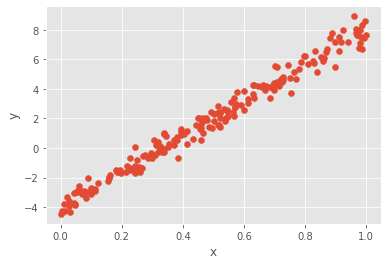

In [29]:
plt.scatter(data, label)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [30]:
weight = torch.rand(1, requires_grad=True)   # Assuming y = x * w + b
bias = torch.rand(1, requires_grad=True)

In [31]:
print(weight, bias)

tensor([0.2949], requires_grad=True) tensor([0.6052], requires_grad=True)


In [32]:
# Hyperparameter
learning_rate = 0.1

In [33]:
total_steps = tqdm_notebook(range(10000))

for step in total_steps:
  prediction = weight * data + bias # forward pass 
  loss = ((prediction - label) ** 2).mean()   # Mean squared error
  if (step + 1) % 100 == 0:
    total_steps.set_description("Loss: %.4f" % loss.detach().item())

  loss.backward()
  # plt.plot(x, weight * x + bias)

  with torch.no_grad():   # Stops tracking variable
    weight -= learning_rate * weight.grad # w_new = w_old - lt*grad
    bias -= learning_rate * bias.grad
    weight.grad.zero_()   # Avoid gradients being accumulated
    bias.grad.zero_()

<ipython-input-33-c3fec061e208>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  total_steps = tqdm_notebook(range(10000))


  0%|          | 0/10000 [00:00<?, ?it/s]

In [34]:
w_hat = weight.detach().item()    # Stops tracking variable
b_hat = bias.detach().item()

print("Learned weight=%.4f, bias=%.4f" % (w_hat, b_hat))

Learned weight=11.9992, bias=-3.9840


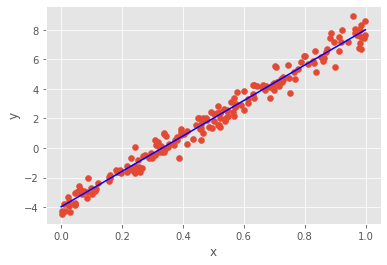

In [35]:
xs = np.linspace(0, 1, 100)
ys = w_hat * xs + b_hat

plt.scatter(data, label)
plt.plot(xs, ys, 'b-')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Build a Model - Linear Regression

But it's still cumbersome to update the weights by hand! You may say.

That makes sense, so PyTorch provides a better approach to do that.

In [36]:
import torch.nn as nn

class ManualLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True))
    
  def forward(self, x):  
    return self.weight * x + self.bias

That's it! You only need to define how the forward pass should be calculated.

PyTorch also has some off-the-shelf loss functions and optimizers to further simplify the process.

In [37]:
# Reset the Data

w, b = 12, -4
data = torch.rand(200, 1)
label = w * data + b + 0.5 * torch.randn(200, 1)

# Set some hyperparameters
learning_rate = 0.01

# Build a Model
model = ManualLinearRegression()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

total_steps = tqdm_notebook(range(10000))

for step in total_steps:
  prediction = model(data)
  loss = loss_fn(label, prediction)
  if (step + 1) % 100 == 0:
    total_steps.set_description("Loss: %.4f" % loss.detach().item())
  
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

<ipython-input-37-519a26d24f26>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  total_steps = tqdm_notebook(range(10000))


  0%|          | 0/10000 [00:00<?, ?it/s]

In [38]:
for name, param in model.named_parameters():
  print("%s=%.4f" % (name, param.item()))

weight=12.0541
bias=-4.0127


In fact, the *Linear Regression* is built-in module in PyTorch, so our model is just a simplified version of `nn.Linear`. You can find more built-in modules in the documentation.

#Task:
Use the Wine quality dataset to train and validate a 2-layer neural network model with ReLU non-linearity. Use nn.Linear to define fully connected layers. Complete the missing parts in code below. 



In [39]:
# Load in the data
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
import pandas as pd
data = pd.read_csv("winequality-red.csv", sep=";")

--2023-02-09 09:18:42--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K   265KB/s    in 0.3s    

2023-02-09 09:18:42 (265 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [40]:
from matplotlib import pyplot as plt
import numpy as np
from numpy.random import randn
from sklearn.preprocessing import StandardScaler
import pdb
from tqdm import notebook

Data = data.drop("quality", axis=1).to_numpy()  # type: ignore
Labels = np.reshape(data["quality"].to_numpy(), (-1, 1))  # type: ignore
Data = np.c_[Data, np.ones((Data.shape[0],1))]
num_features = Data.shape[1]
num_targets = 1

X_train, X_test = np.array_split(Data, 2)  # type: ignore
y_train, y_test = np.array_split(Labels, 2)  # type: ignore

feature_scaler = StandardScaler()
target_scaler = StandardScaler()
# Normalize the data using the first & second moments computed from the training set
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)


Write a forward pass

In [41]:
# Define a 2-layer MLP model
class MultilayerPerceptron(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)  # w * x + b
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self, x):
    #TASK: write a forward pass
    return out

Define the loss criterion as mean squared error (MSE) using `nn.MSELoss`:

In [ ]:
# Set the Data
data=torch.tensor(X_train.copy()).float()
label=torch.tensor(y_train.copy()).float()

# Set some hyperparameters
learning_rate = 0.01

# Build a Model
model = MultilayerPerceptron(12, 30, 1)
print(model)

#TASK: define loss criterion
#loss_criterion = 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

total_steps = notebook.tqdm(range(10000))

model.train()
for step in total_steps:
  prediction = model(data)
  loss = loss_criterion(label, prediction)
  if (step + 1) % 100 == 0:
    total_steps.set_description("Loss: %.4f" % loss.detach().item())
  
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

Complete model evaluation on the test data, i.e. perform a forward pass using test data, and compute MSE.

In [ ]:
#testing
#Use test data to evaluate performace:
data=torch.tensor(X_test.copy()).float()
label=torch.tensor(y_test.copy()).float()
#TASK: compute MSE loss on the test data